In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform

In [11]:
iris = load_iris()
X = iris.data[:100]  
y = iris.target[:100].reshape(-1, 1)

In [12]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
np.random.seed(42)
input_dim = X.shape[1]
output_dim = y.shape[1]


In [15]:
manual_weights = np.random.uniform(-0.05, 0.05, size=(input_dim, output_dim))
manual_bias = np.random.uniform(-0.05, 0.05, size=(1, output_dim))

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

manual_z = np.dot(X, manual_weights) + manual_bias
manual_predictions = sigmoid(manual_z)

In [17]:
model = Sequential([
    Dense(output_dim, activation='sigmoid', 
          kernel_initializer=RandomUniform(-0.05, 0.05),
          bias_initializer=RandomUniform(-0.05, 0.05),
          input_shape=(input_dim,))
])


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.layers[0].set_weights([manual_weights, manual_bias.flatten()])  # Fixed dimension order

keras_predictions = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


In [ ]:
print(f"Manual weights shape: {manual_weights.shape}")  
print(f"Keras weights shape: {model.layers[0].get_weights()[0].shape}") 

Manual weights shape: (4, 2)
Keras weights shape: (4, 2)


In [20]:
comparison = pd.DataFrame({
    'Actual Class': np.argmax(y, axis=1),
    'Manual Prediction': np.argmax(manual_predictions, axis=1),
    'Keras Prediction': np.argmax(keras_predictions, axis=1),
    'Manual Prob Class 0': manual_predictions[:, 0],
    'Keras Prob Class 0': keras_predictions[:, 0],
    'Manual Prob Class 1': manual_predictions[:, 1],
    'Keras Prob Class 1': keras_predictions[:, 1]
})

print("\nPrediction Comparison (First 10 Samples):")
print(comparison.head(10).to_string(index=False))


Prediction Comparison (First 10 Samples):
 Actual Class  Manual Prediction  Keras Prediction  Manual Prob Class 0  Keras Prob Class 0  Manual Prob Class 1  Keras Prob Class 1
            0                  0                 0             0.529423            0.529423             0.499903            0.499903
            0                  0                 0             0.524333            0.524333             0.493784            0.493784
            0                  0                 0             0.528335            0.528335             0.491887            0.491887
            0                  0                 0             0.526422            0.526422             0.488413            0.488413
            0                  0                 0             0.531126            0.531126             0.498656            0.498656
            0                  0                 0             0.527109            0.527109             0.508734            0.508734
            0             

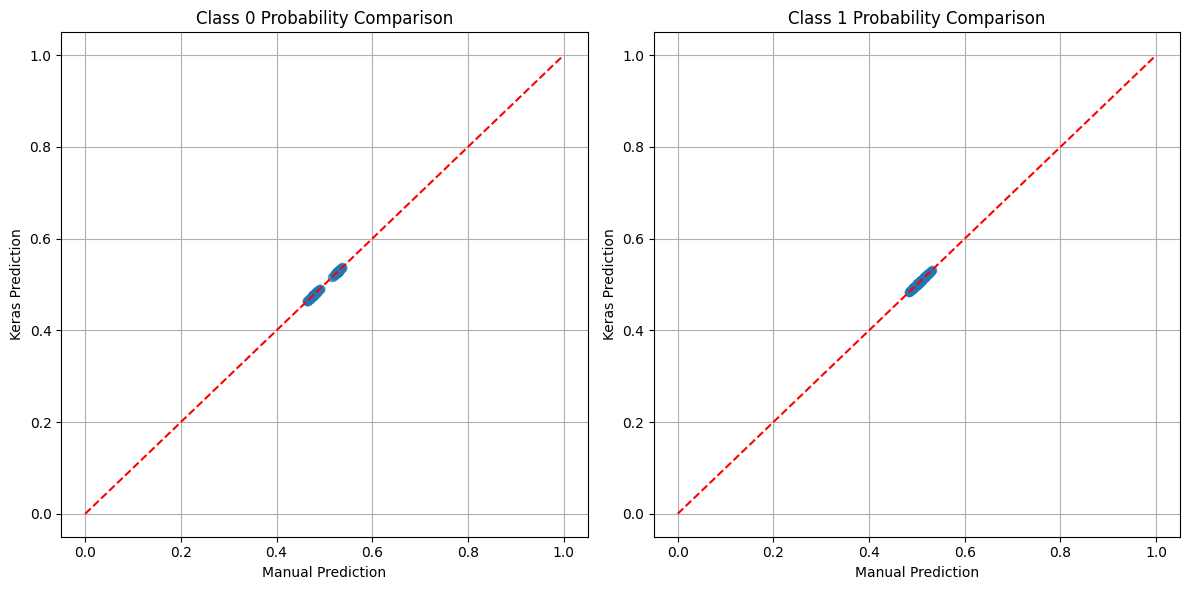

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(output_dim):
    plt.subplot(1, output_dim, i+1)
    plt.scatter(manual_predictions[:, i], keras_predictions[:, i], alpha=0.6)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.title(f'Class {i} Probability Comparison')
    plt.xlabel('Manual Prediction')
    plt.ylabel('Keras Prediction')
    plt.grid(True)
plt.tight_layout()
plt.show()